# Find the Flag

In this program, we will try to find a solution to the following questions:

1. Given a flag, can it be guessed which continent it comes from? 

2. What are some of the features that would clue us in?

Maybe some of the colors are good indicators. The presence or absence of certain shapes could give us a hint. In this project, we will use decision trees to try to predict the continent of flags based on several of these features.

We will explore which features are the best to use and the best way to create our decision tree.

The dataset has been taken from UCI’s Machine Learning Repository (http://archive.ics.uci.edu/ml/datasets/Flags)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


Bad key "text.kerning_factor" on line 4 in
C:\Users\Parnashri\Anaconda_3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


<h3>Data</h3>

In [2]:
flags = pd.read_csv('flags.csv', header=0)

In [3]:
flags.columns

Index(['Name', 'Landmass', 'Zone', 'Area', 'Population', 'Language',
       'Religion', 'Bars', 'Stripes', 'Colours', 'Red', 'Green', 'Blue',
       'Gold', 'White', 'Black', 'Orange', 'Mainhue', 'Circles', 'Crosses',
       'Saltires', 'Quarters', 'Sunstars', 'Crescent', 'Triangle', 'Icon',
       'Animate', 'Text', 'Topleft', 'Botright'],
      dtype='object')

In [4]:
flags.head(10)

,Name,Landmass,Zone,Area,Population,Language,Religion,Bars,Stripes,Colours,...,Saltires,Quarters,Sunstars,Crescent,Triangle,Icon,Animate,Text,Topleft,Botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red
5,Angola,4,2,1247,7,10,5,0,2,3,...,0,0,1,0,0,1,0,0,red,black
6,Anguilla,1,4,0,0,1,1,0,1,3,...,0,0,0,0,0,0,1,0,white,blue
7,Antigua-Barbuda,1,4,0,0,1,1,0,1,5,...,0,0,1,0,1,0,0,0,black,red
8,Argentina,2,3,2777,28,2,0,0,3,2,...,0,0,0,0,0,0,0,0,blue,blue
9,Argentine,2,3,2777,28,2,0,0,3,3,...,0,0,1,0,0,0,0,0,blue,blue


<h3>Creating Data and Labels</h3>

We are eventually going to use create a decision tree to classify what Landmass a country is on.

In [5]:
labels = flags[['Landmass']]

We have our labels. Now we want to choose which columns will help our decision tree correctly classify those labels. Let’s see if we can predict where a country is based only on the colors of its flag.

In [6]:
data = flags[["Red","Green","Blue","Gold","White","Black","Orange"]]

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, random_state=1)

<h3>Making and Testing the model</h3>

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
tree = DecisionTreeClassifier(random_state = 1)

In [11]:
tree.fit(train_data, train_labels)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [12]:
tree.score(test_data, test_labels)

0.3469387755102041

There are 6 possible landmasses & on random guessing we would expect to be right about 16% of the time.
Our decision tree did beat our random guessing.

<h3>Tuning the Model</h3>

We now have a good baseline of how our model performs with these features. Let’s see if we can prune the tree to make it better! Rather than printing the score of each tree, let us graph it! We want the x-axis to show the depth of the tree and the y-axis to show the tree’s score.

In [13]:
scores = []
for i in range(1, 21):
    tree = DecisionTreeClassifier(random_state = 1, max_depth = i)
    tree.fit(train_data, train_labels)
    scores.append(tree.score(test_data, test_labels))

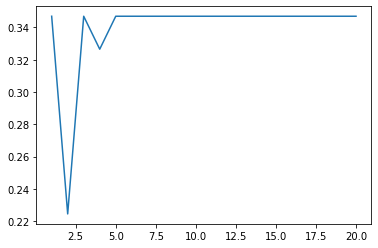

In [14]:
plt.plot(range(1,21), scores)

Our graph doesn’t really look like we would expect it to. It seems like the depth of the tree isn’t really having an impact on its performance. This might be a good indication that we’re not using enough features. Let’s add all the features that have to do with shapes to our data.

In [15]:
data = flags[["Red", "Green", "Blue", "Gold", "White", "Black", "Orange", "Circles","Crosses","Saltires","Quarters",
              "Sunstars","Crescent","Triangle"]]

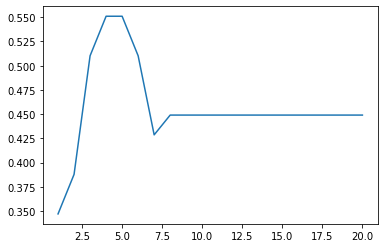

In [16]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, random_state=1)
scores = []
for i in range(1, 21):
    tree = DecisionTreeClassifier(random_state = 1, max_depth = i)
    tree.fit(train_data, train_labels)
    scores.append(tree.score(test_data, test_labels))
plt.plot(range(1,21), scores)    

That graph looks more like what we would expect. If the tree is too short, we are underfitting and not accurately representing the training data. If the tree is too big, we are getting too specific and relying too heavily on the training data.

This project can be further extended by following different ways:
1. Rather than predicting the "Landmass" feature, "Language" feature could be predicted.
2. Finding a subset of features that work better than what we are currently using. An important note is that a feature that has categorical data won’t work very well as a feature. For example, we don’t want a decision node to split nodes based on whether the value for "Language" is above or below 5.
3. Tuning more parameters of the model. More description of the parameters can be found in the Decision Tree Classifier documentation. For example, it can be seen what happens if the parameter max_leaf_nodes is tuned. It can be thought if we would be overfitting or underfitting the data based on how many leaf nodes we allow.